In [1]:
import numpy as np

import matplotlib.pyplot as plt

from netCDF4 import Dataset

In [2]:
with Dataset( 'density_sample.nc', 'r' ) as dset:
    
    lon = dset['longitude'][:]
    lat = dset['latitude'][:]
    
    rho_orig = dset['rho'][0,0,:,:]

In [3]:
with Dataset( 'filter_100km.nc', 'r' ) as dset:
    rho_100km = dset['rho'][0,0,:,:]
    
with Dataset( 'filter_500km.nc', 'r' ) as dset:
    rho_500km = dset['rho'][0,0,:,:]
    
with Dataset( 'filter_2000km.nc', 'r' ) as dset:
    rho_2000km = dset['rho'][0,0,:,:]

Text(0.0, 1.0, 'Original (Unfiltered) Density')

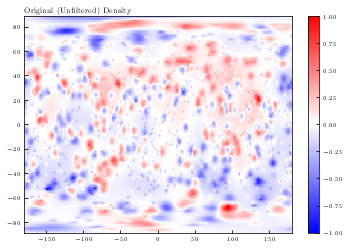

In [4]:
fig, ax = plt.subplots( 1, 1, figsize = ( 6,4 ) )

cv = np.max( np.abs( rho_orig ) )

qm = ax.pcolormesh( lon, lat, rho_orig, vmin = -cv, vmax = cv )

plt.colorbar( qm, ax = ax )

ax.set_title("Original (Unfiltered) Density", loc = 'left', pad = 3)

Text(0.0, 1.0, 'B) 2000km Fine Density')

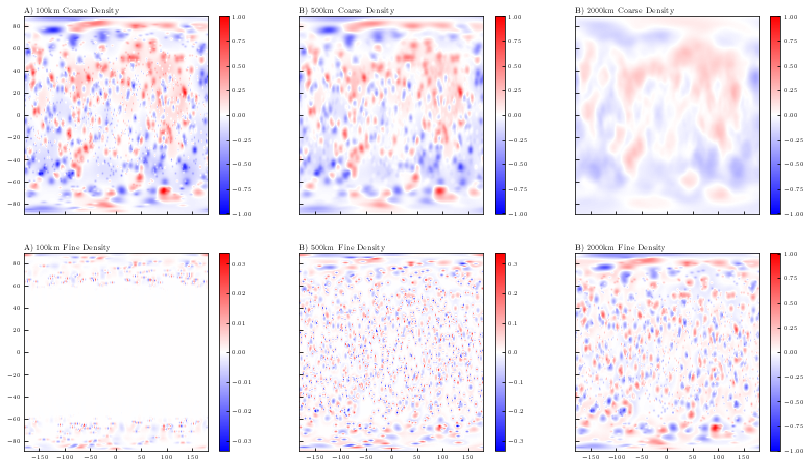

In [5]:
fig, axes = plt.subplots( 2, 3, sharex = True, sharey = True, figsize = (14, 8) )

qms = np.zeros( axes.shape, dtype = 'object' )

cv = np.max( np.abs( rho_orig ) )

qms[0,0] = axes[0,0].pcolormesh( lon, lat, rho_100km,  vmin = -cv, vmax = cv )
qms[0,1] = axes[0,1].pcolormesh( lon, lat, rho_500km,  vmin = -cv, vmax = cv )
qms[0,2] = axes[0,2].pcolormesh( lon, lat, rho_2000km, vmin = -cv, vmax = cv )

qms[1,0] = axes[1,0].pcolormesh( lon, lat, rho_orig - rho_100km,  vmin = -cv / 30, vmax = cv / 30 )
qms[1,1] = axes[1,1].pcolormesh( lon, lat, rho_orig - rho_500km,  vmin = -cv / 3,  vmax = cv / 3  )
qms[1,2] = axes[1,2].pcolormesh( lon, lat, rho_orig - rho_2000km, vmin = -cv / 1 ,  vmax = cv / 1   )

for qm, ax in zip( qms.ravel(), axes.ravel() ):
    plt.colorbar( qm, ax = ax )

axes[0,0].set_title( "A) 100km Coarse Density",  loc = 'left', pad = 3 )
axes[0,1].set_title( "B) 500km Coarse Density",  loc = 'left', pad = 3 )
axes[0,2].set_title( "B) 2000km Coarse Density", loc = 'left', pad = 3 )

axes[1,0].set_title( "A) 100km Fine Density",  loc = 'left', pad = 3 )
axes[1,1].set_title( "B) 500km Fine Density",  loc = 'left', pad = 3 )
axes[1,2].set_title( "B) 2000km Fine Density", loc = 'left', pad = 3 )